# Prophet

Prophet от Facebook

In [ ]:
!pip install prophet

In [1]:
import pandas as pd
from prophet import Prophet

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('example_wp_log_peyton_manning.csv')
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


<Axes: xlabel='ds'>

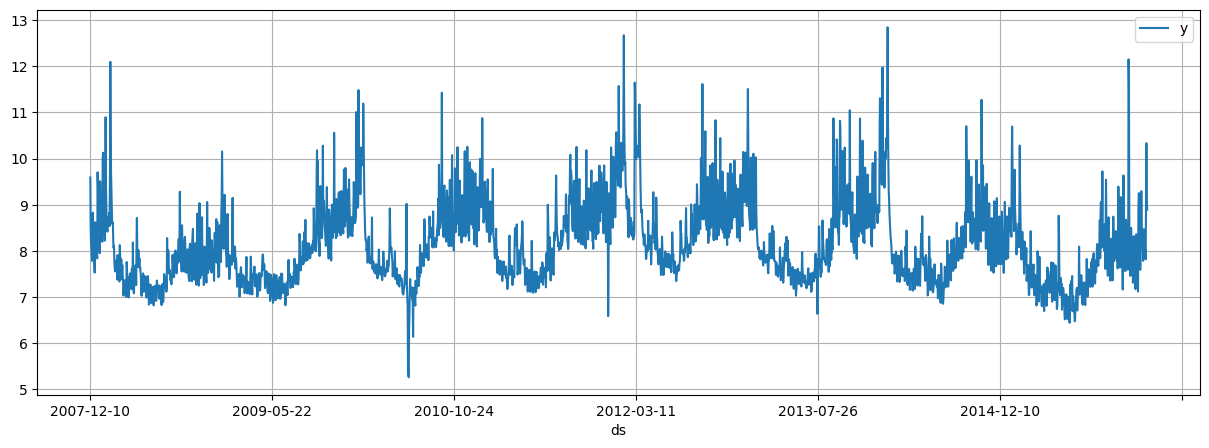

In [3]:
df.plot(x='ds', y='y', figsize=(15, 5), grid=True)

Посмотрим сразу, как Prophet справится с построением модели "из коробки":

In [4]:
m = Prophet()
m.fit(df)

12:05:30 - cmdstanpy - INFO - Chain [1] start processing
12:05:31 - cmdstanpy - INFO - Chain [1] done processing


Для построения прогноза можно сгенерировать расширенный датафрейм "на будущее" при помощи специальной встроенной функции:

In [32]:
future = m.make_future_dataframe(periods=365)  # имеющийся период + год
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


При помощи метода `predict` мы можем получить прогноз на сгенерированный датафрейм `future`. При этом в качестве результата Prophet генерирует не только значение ряда, но и верхнюю и нижнюю границы доверительного интервала а также компоненты модели (тоже с доверительными интервалами). 

- `yhat` - предсказанное значение
- `yhat_upper` / `yhat_lower` - верхняя и нижняя граница доверительного интервала. Для других столбцов также имеются их границы с приставками `upper` и `lower`
- `trend` - компонента тренда
- `weekly` - недельная сезонность
- `yearly` - годовая сезонность
- `additive_terms` - сумма всех аддитивных сезонностей
- `multiplicative_terms` - произведение всех мультипликативных сезонностей (по дефолту они не используются)

In [6]:
forecast = m.predict(future)
forecast.tail(14)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
3256,2017-01-06,7.200680,7.166428,8.618196,6.905209,7.567137,0.676165,0.676165,0.676165,-0.069571,-0.069571,-0.069571,0.745736,0.745736,0.745736,0.0,0.0,0.0,7.876845
3257,2017-01-07,7.199656,6.933675,8.395432,6.902267,7.567584,0.460656,0.460656,0.460656,-0.311716,-0.311716,-0.311716,0.772372,0.772372,0.772372,0.0,0.0,0.0,7.660312
3258,2017-01-08,7.198632,7.336942,8.808717,6.899506,7.569528,0.846911,0.846911,0.846911,0.048277,0.048277,0.048277,0.798634,0.798634,0.798634,0.0,0.0,0.0,8.045543
3259,2017-01-09,7.197608,7.613540,9.110643,6.897569,7.571889,1.176790,1.176790,1.176790,0.352295,0.352295,0.352295,0.824495,0.824495,0.824495,0.0,0.0,0.0,8.374399
3260,2017-01-10,7.196585,7.465267,8.931157,6.896469,7.574215,0.969570,0.969570,0.969570,0.119631,0.119631,0.119631,0.849939,0.849939,0.849939,0.0,0.0,0.0,8.166154
3261,2017-01-11,7.195561,7.264143,8.708968,6.895369,7.575265,0.808285,0.808285,0.808285,-0.066661,-0.066661,-0.066661,0.874945,0.874945,0.874945,0.0,0.0,0.0,8.003845
3262,2017-01-12,7.194537,7.274325,8.751936,6.890333,7.574840,0.827234,0.827234,0.827234,-0.072256,-0.072256,-0.072256,0.899490,0.899490,0.899490,0.0,0.0,0.0,8.021771
3263,2017-01-13,7.193513,7.328668,8.755851,6.885007,7.574404,0.853961,0.853961,0.853961,-0.069571,-0.069571,-0.069571,0.923532,0.923532,0.923532,0.0,0.0,0.0,8.047474
3264,2017-01-14,7.192489,7.075348,8.579636,6.882002,7.575130,0.635294,0.635294,0.635294,-0.311716,-0.311716,-0.311716,0.947010,0.947010,0.947010,0.0,0.0,0.0,7.827783
3265,2017-01-15,7.191465,7.520060,8.897441,6.880484,7.577210,1.018110,1.018110,1.018110,0.048277,0.048277,0.048277,0.969832,0.969832,0.969832,0.0,0.0,0.0,8.209575


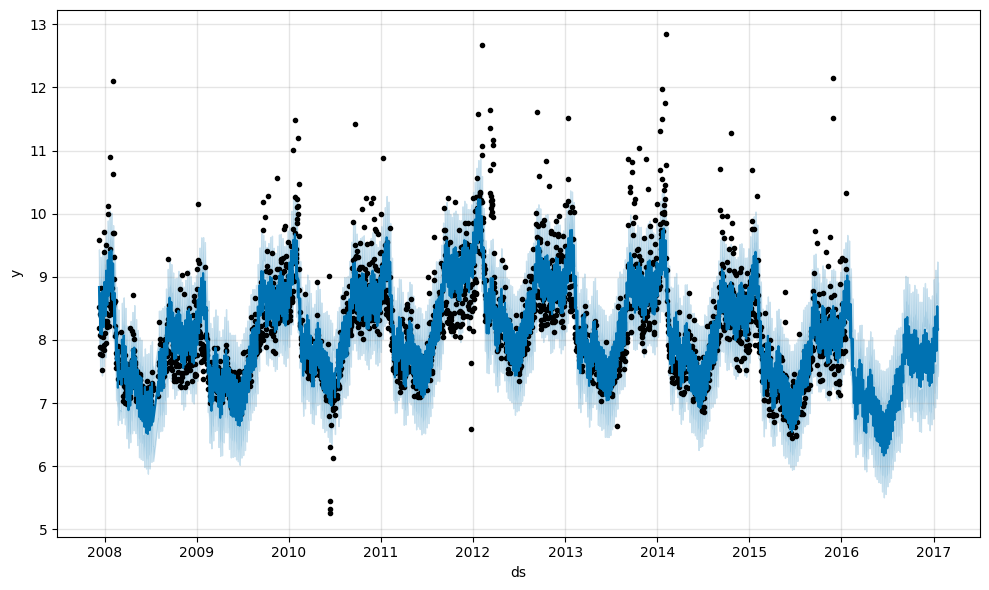

In [7]:
# в Prophet есть встроенная функция для построения ряда

f = m.plot(forecast)

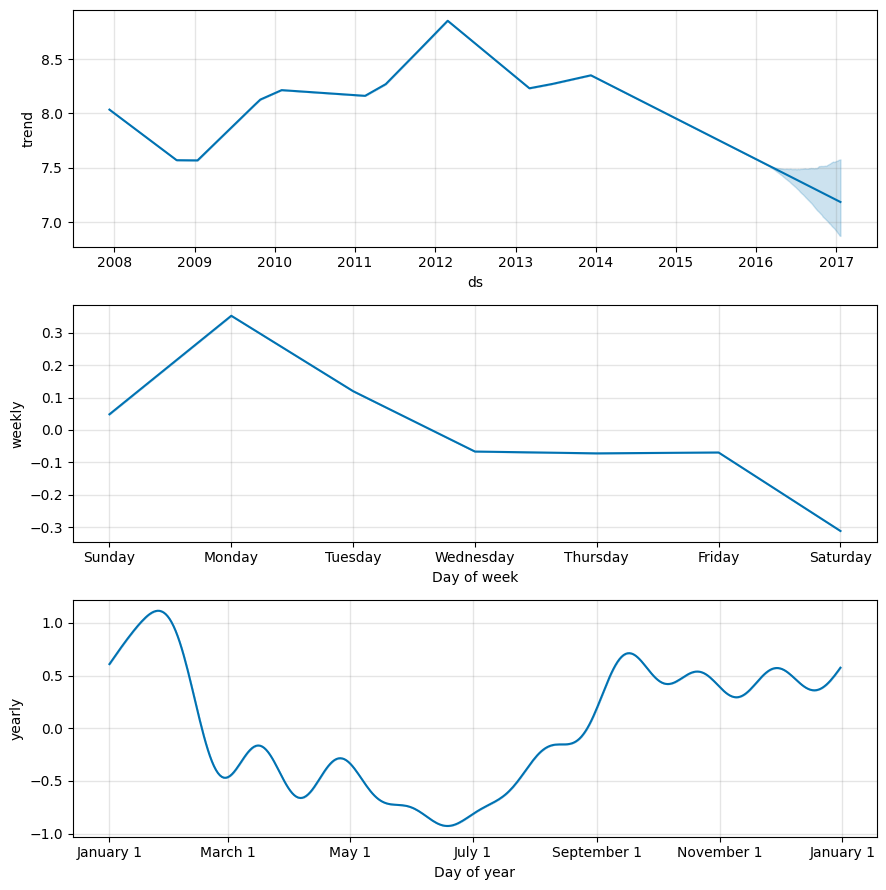

In [8]:
# также можем вывести график отдельных компонентов

f = m.plot_components(forecast)

### Настройка тренда

Как мы видим, по дефолту Prophet использует кусочно-линейный тренд. Давайте узнаем, как можно влиять на точки перемены тренда и как использовать логистический тренд с насыщением.

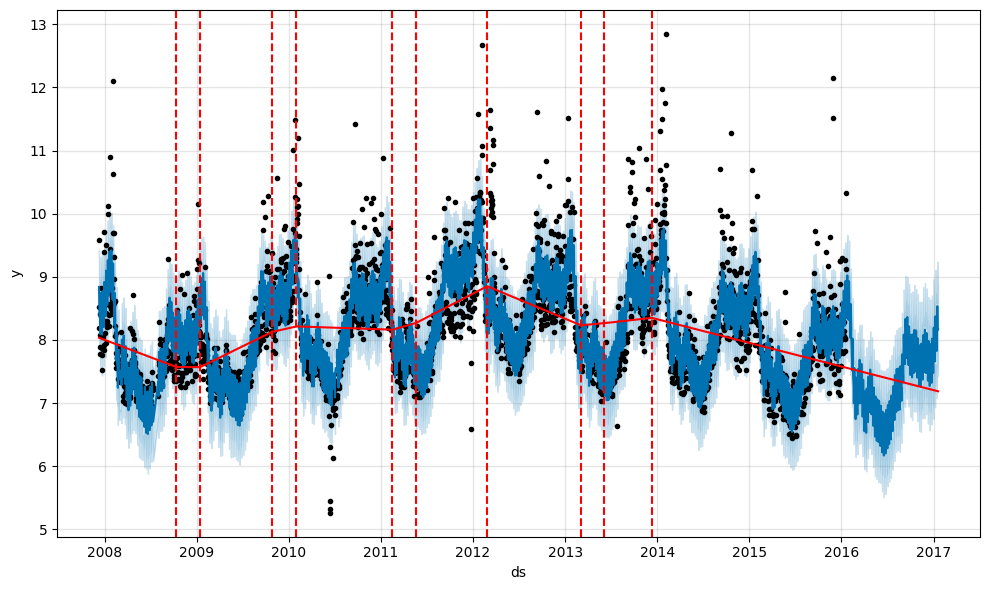

In [9]:
# чтобы отобразить точки перемены тренда, используем специальную доп функцию add_changepoints_to_plot

from prophet.plot import add_changepoints_to_plot

fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

В первую очередь, мы имеем возможность влиять на гибкость тренда при помощи параметра модели `changepoint_prior_scale`. По дефолту он равен `0.05`. 

Создадим новую модель с увеличеннов в 10 раз гибкостью тренда:

In [34]:
m = Prophet(changepoint_prior_scale=0.5)
forecast = m.fit(df).predict(future)

12:58:15 - cmdstanpy - INFO - Chain [1] start processing
12:58:21 - cmdstanpy - INFO - Chain [1] done processing


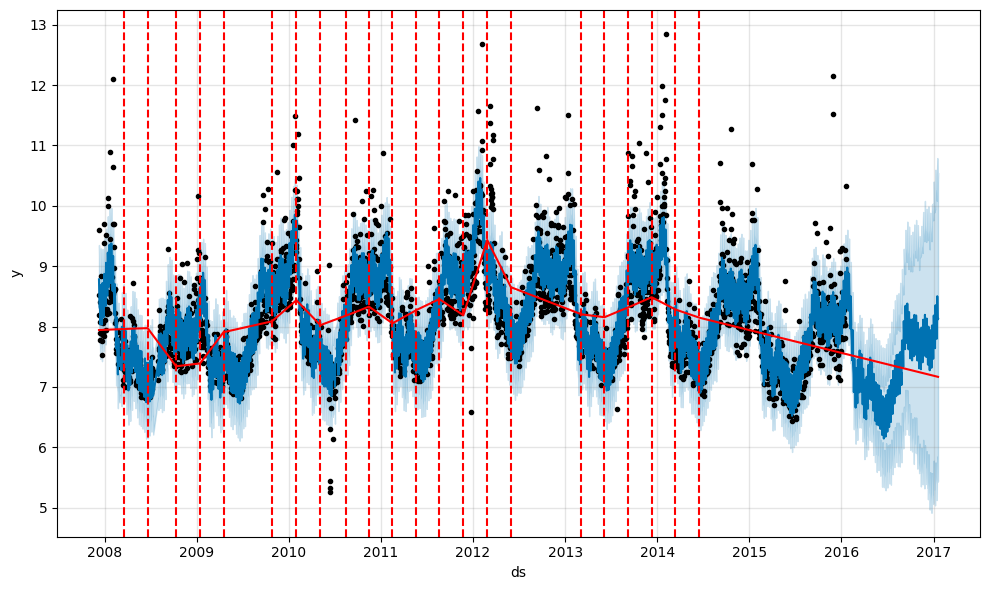

In [35]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

Видим, что увеличение гибкости не только повысило углы наклона тренда, но и увеличило число автоматически обнаруженных точек перемены.

Давайте теперь попробуем уменьшить их число до 1, явно задав точку перемены в `2014-01-01`

In [14]:
m = Prophet(changepoints=['2014-01-01'])
forecast = m.fit(df).predict(future)

12:15:58 - cmdstanpy - INFO - Chain [1] start processing
12:15:58 - cmdstanpy - INFO - Chain [1] done processing


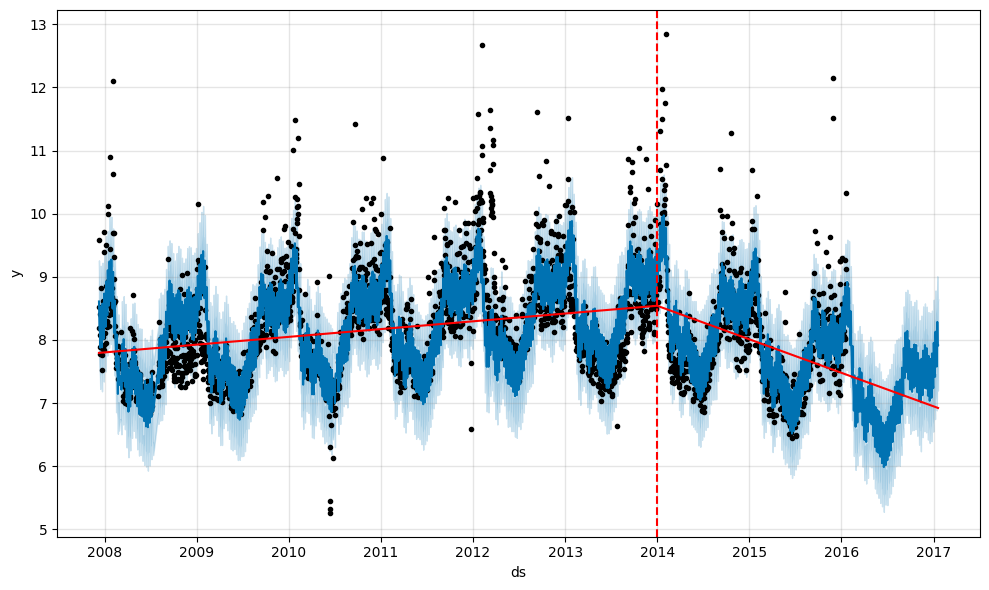

In [15]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

Мы также имеем возможность использовать логистическую модель тренда. Однако для этого мы сперва должны указать в датафрейме данные об уровне вместимости. Сделать это нужно в столбце `cap`. Этот уровень может быть разным в разные моменты времени.

In [16]:
# укажем одинаковую вместимость на весь период

df['cap'] = 8.5

In [17]:
# новая модель с логистическим трендом

m = Prophet(growth='logistic')
m.fit(df)

12:17:22 - cmdstanpy - INFO - Chain [1] start processing
12:17:23 - cmdstanpy - INFO - Chain [1] done processing


In [18]:
# продлим датафрейм сразу на 5 лет, предполагая ту же вместимость тренда

future = m.make_future_dataframe(periods=1826)
future['cap'] = 8.5

In [19]:
forecast = m.predict(future)

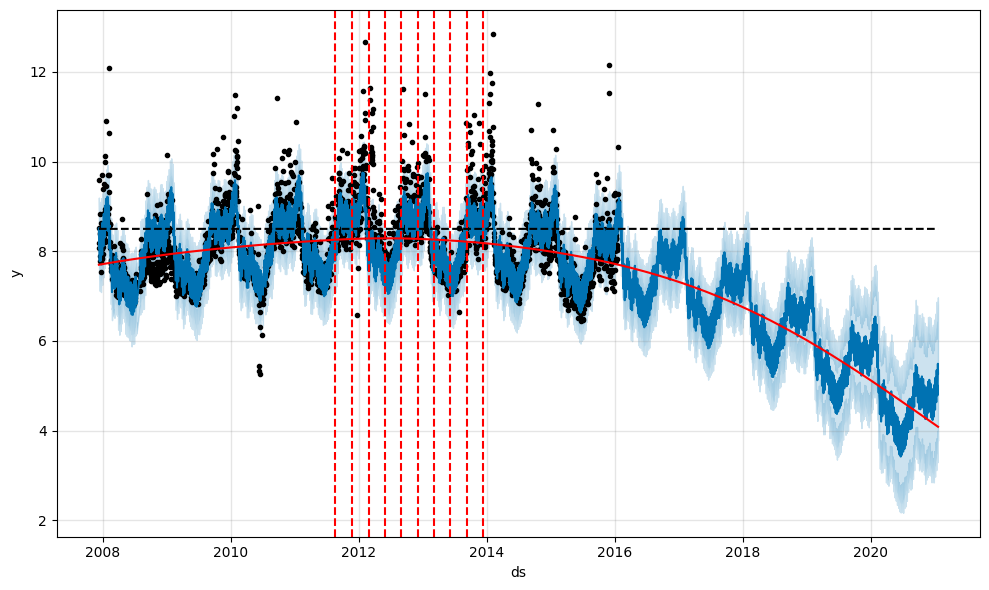

In [20]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

### Праздники и другие события

В Prophet есть возможность как задать собственные даты праздников, так и использовать встроенные таблицы.

Мы с вами анализируем данные об игроке в американский футбол, поэтому будет логично включить данные о ежегодных плэйоффах и Супербоуле, который проходит раз в несколько лет. Конечно же, добавим и обычные американские праздники, данные о которых уже есть в Prophet.

Для задания кастомных праздников нужно создать датафрейм с минимум двумя колонками: название праздника `holiday` и его дата `ds`. В случае, если праздники продолжаются не 1 день, можно также включить колонки `lower_window` / `upper_window`, в которых указывается размах окна эффекта вперёд и назад от праздника.

In [21]:
playoffs = pd.DataFrame({
  'holiday': 'playoff',
  'ds': pd.to_datetime(['2008-01-13', '2009-01-03', '2010-01-16',
                        '2010-01-24', '2010-02-07', '2011-01-08',
                        '2013-01-12', '2014-01-12', '2014-01-19',
                        '2014-02-02', '2015-01-11', '2016-01-17',
                        '2016-01-24', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})

superbowls = pd.DataFrame({
  'holiday': 'superbowl',
  'ds': pd.to_datetime(['2010-02-07', '2014-02-02', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})

holidays = pd.concat((playoffs, superbowls))

holidays

,holiday,ds,lower_window,upper_window
0,playoff,2008-01-13,0,1
1,playoff,2009-01-03,0,1
2,playoff,2010-01-16,0,1
3,playoff,2010-01-24,0,1
4,playoff,2010-02-07,0,1
5,playoff,2011-01-08,0,1
6,playoff,2013-01-12,0,1
7,playoff,2014-01-12,0,1
8,playoff,2014-01-19,0,1
9,playoff,2014-02-02,0,1


In [22]:
# передаём кастомные праздники
m = Prophet(holidays=holidays)

# добавляем встроенные для США
m.add_country_holidays(country_name='US')

m.fit(df)

12:23:06 - cmdstanpy - INFO - Chain [1] start processing
12:23:07 - cmdstanpy - INFO - Chain [1] done processing


Посмотрим на все имеющиеся праздники:

In [23]:
m.train_holiday_names

0                         playoff
1                       superbowl
2                  New Year's Day
3                    Memorial Day
4                Independence Day
5                       Labor Day
6                    Veterans Day
7                    Thanksgiving
8                   Christmas Day
9        Christmas Day (observed)
10     Martin Luther King Jr. Day
11          Washington's Birthday
12                   Columbus Day
13        Veterans Day (observed)
14    Independence Day (observed)
15      New Year's Day (observed)
dtype: object

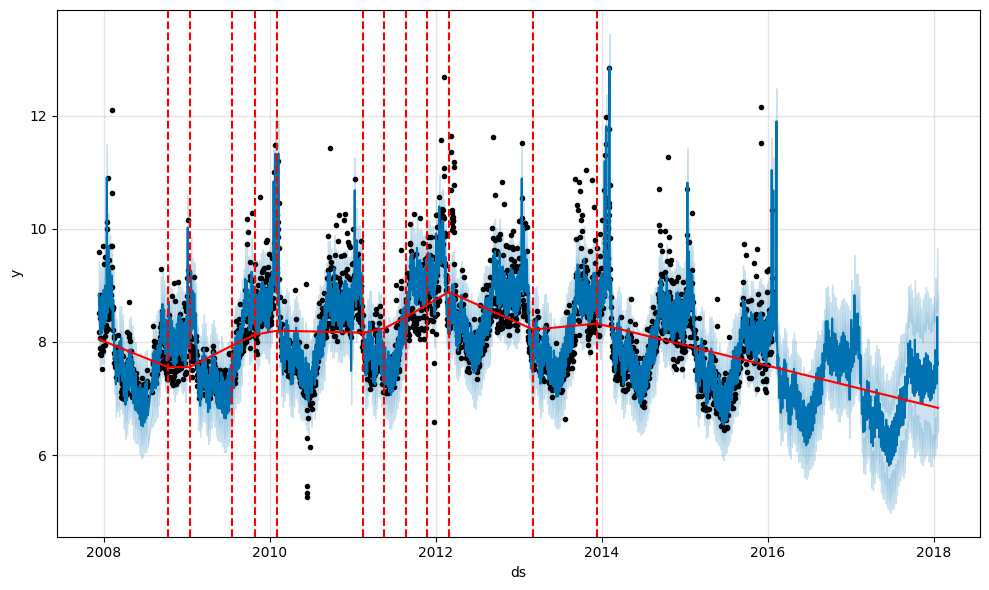

In [24]:
future = m.make_future_dataframe(periods=730)

forecast = m.predict(future)

fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

Мы видим, что в нашей модели появились заметные пики. Чтобы убедиться, что это эффект от праздников, можно вывести разложение на компоненты.

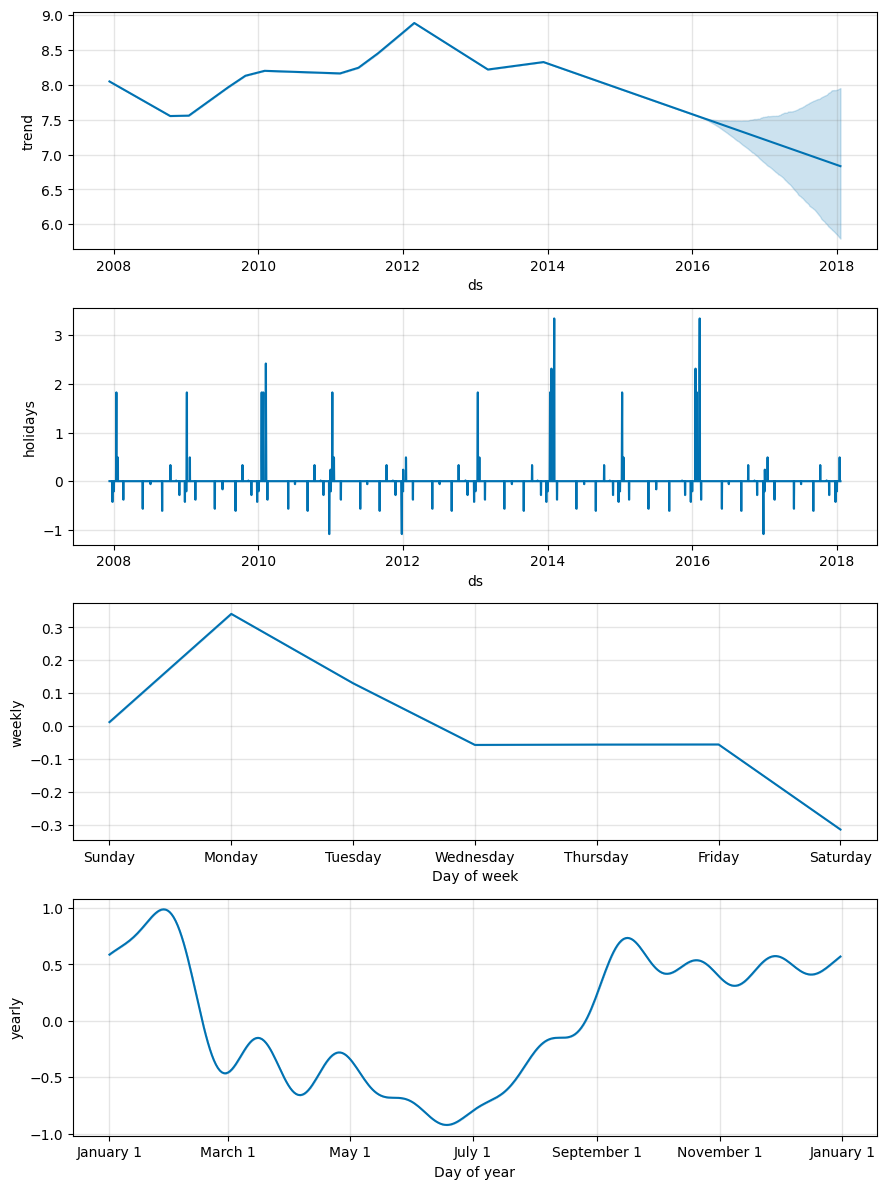

In [25]:
fig = m.plot_components(forecast)

### Настройка сезонности

Осталось разобраться с сезонными компонентами модели. Мы с вами говорили, что дефолтный порядок Фурье-разложения для недельной и годовой сезонности равен 3 и 10 соответственно. Конечно же, их можно менять. Чем выше порядок разложения, тем больше мелких эффектов сможет учитывать модель. И наоборот: при малом порядке график сезонности будет всё больше похож на обычный синус/косинус.

12:26:31 - cmdstanpy - INFO - Chain [1] start processing
12:26:32 - cmdstanpy - INFO - Chain [1] done processing


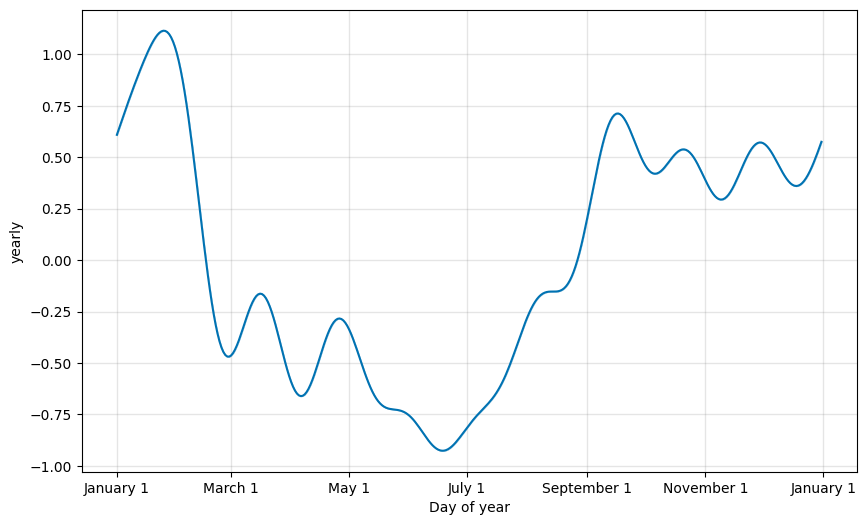

In [26]:
# будем строить отдельно график годовой сезонности

from prophet.plot import plot_yearly

m = Prophet().fit(df)

a = plot_yearly(m)

12:26:53 - cmdstanpy - INFO - Chain [1] start processing
12:26:54 - cmdstanpy - INFO - Chain [1] done processing


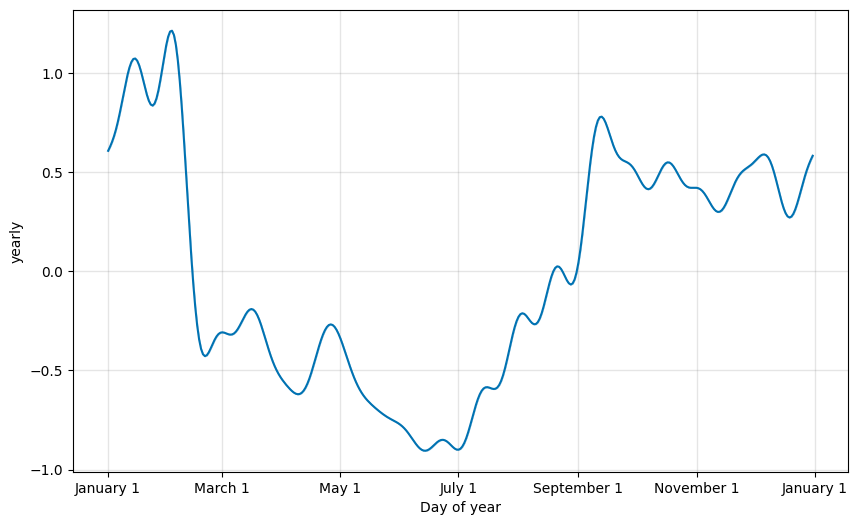

In [27]:
# попробуем увеличить порядок до 20

m = Prophet(yearly_seasonality=20).fit(df)

a = plot_yearly(m)

12:27:35 - cmdstanpy - INFO - Chain [1] start processing
12:27:35 - cmdstanpy - INFO - Chain [1] done processing


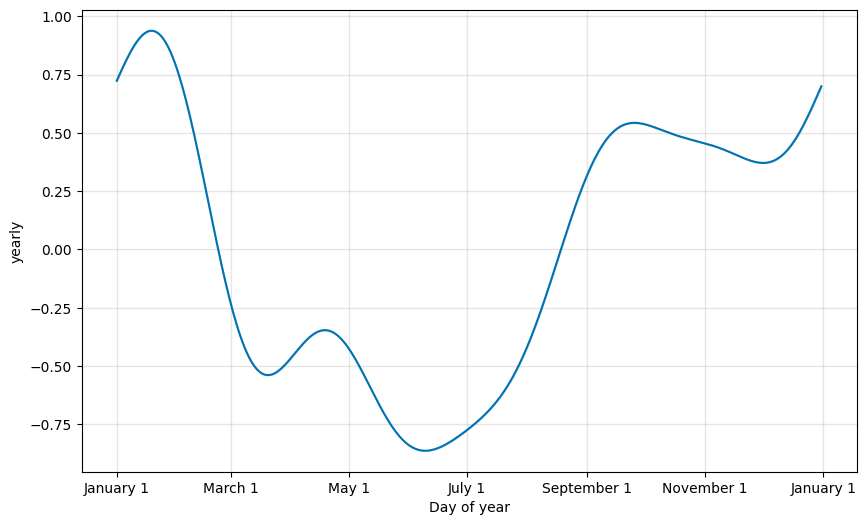

In [28]:
# или уменьшить до 5

m = Prophet(yearly_seasonality=5).fit(df)

a = plot_yearly(m)

При желании в модель Prophet можно добавить кастомные сезонности или убрать уже существующие

12:29:29 - cmdstanpy - INFO - Chain [1] start processing
12:29:29 - cmdstanpy - INFO - Chain [1] done processing


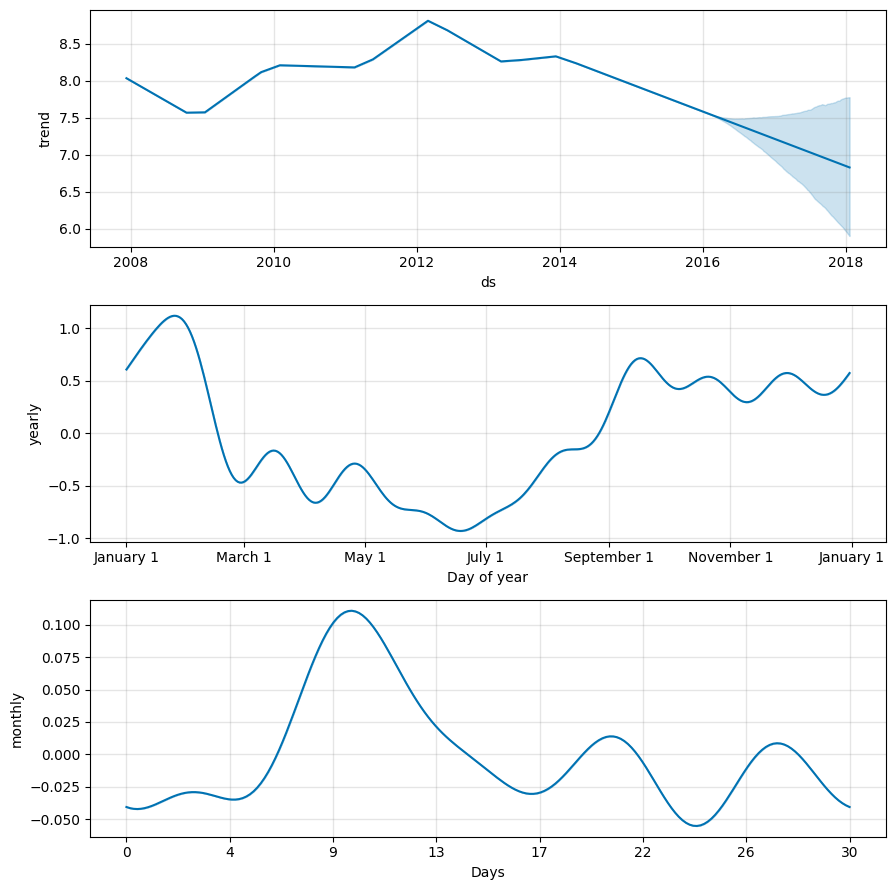

In [29]:
# удалим недельную сезонность
m = Prophet(weekly_seasonality=False)

# добавим месячную сезонность (с периодом 30.5 и порядком 5) 
m.add_seasonality(name='monthly', period=30.5, fourier_order=5)

forecast = m.fit(df).predict(future)

fig = m.plot_components(forecast)

### Дополнительные регрессоры

Модель также может учитывать эффекты от любых внешних факторов посредством механизма добавления дополнительных регрессоров. Для этого в нашем датафрейме нужно создать дополнительную колонку со значениями регрессора (эти значения буду домножаться на подобранный коэффициент). По итогу к модели будет добавлено новое линейное слагаемое.

Например, в соревновательный сезон матчи NFL проходят по воскресеньям. Мы можем добавить дополнительный регрессор, который будет равен 1 в эти дни и 0 все остальные. Аналогичным образом могут быть добавлены эффекты от каких-либо новостей, мировых событий и т.п.

12:33:35 - cmdstanpy - INFO - Chain [1] start processing
12:33:35 - cmdstanpy - INFO - Chain [1] done processing


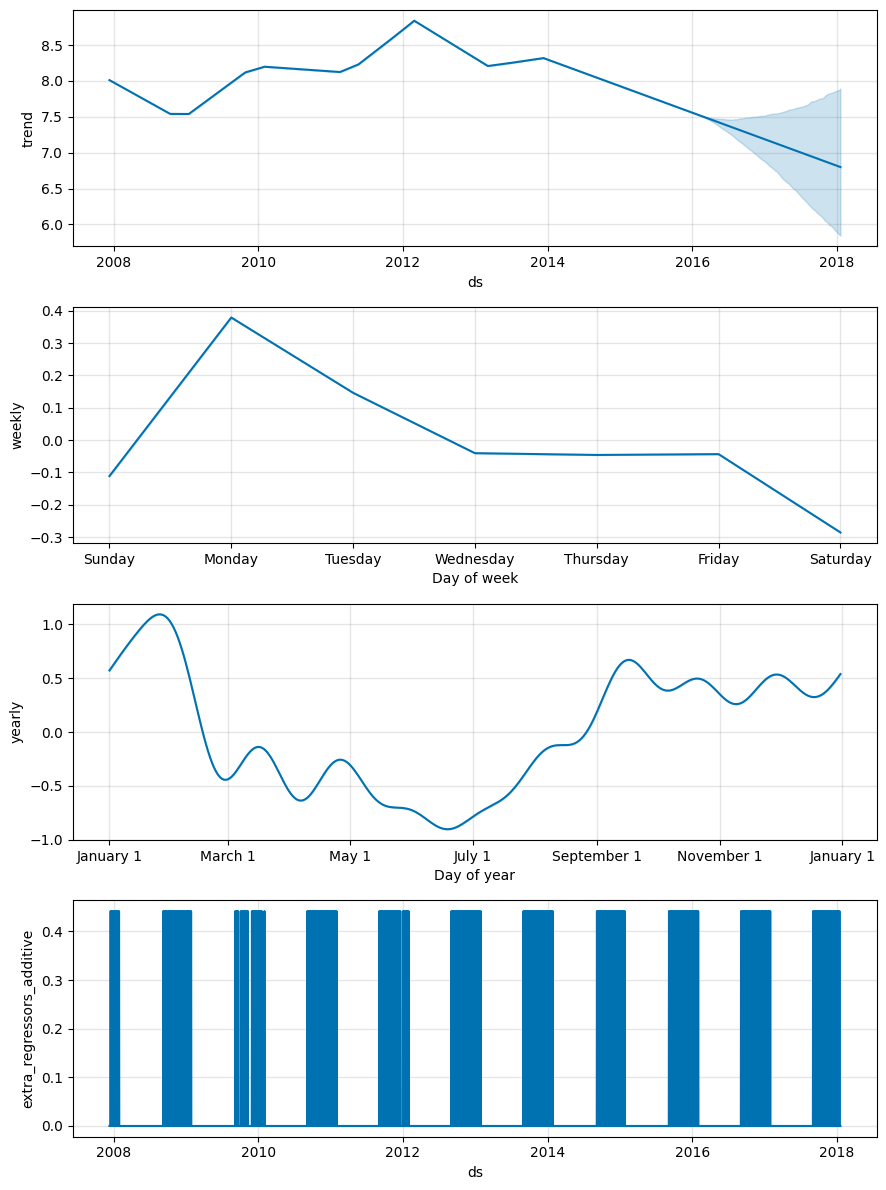

In [30]:
def nfl_sunday(ds):
    date = pd.to_datetime(ds)
    # сезон NFL длится с сентября по январь
    if date.weekday() == 6 and (date.month > 8 or date.month < 2):
        return 1
    else:
        return 0
        
df['nfl_sunday'] = df['ds'].apply(nfl_sunday)

m = Prophet()
m.add_regressor('nfl_sunday')  # учёт колонки датафрейма в качестве доп регрессора
m.fit(df)

# в прогнозный датафрейм тоже необходимо добавить колонку с регрессором
future['nfl_sunday'] = future['ds'].apply(nfl_sunday)

forecast = m.predict(future)

fig = m.plot_components(forecast)

Как мы видим, в нашей модели был добавлен эффект от выходных NFL в виде дополнительного слагаемого чуть больше ~0.4